In [33]:
from nn import CameraClassifier
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

import os
import sys
sys.path.append('../checkpoints')
sys.path.append('../training_data')

In [4]:
# merge the data, create training and test sets

d1 = np.load('./training_data/computer.npz')
d2 = np.load('./training_data/et.npz')
d3 = np.load('./training_data/gopher.npz')
d4 = np.load('./training_data/kermit.npz')

In [8]:
x = []
y = []
for datum_x, datum_y in zip(d1['x'], d1['y']):
    x.append(datum_x)
    y.append(datum_y)
for datum_x, datum_y in zip(d2['x'], d2['y']):
    x.append(datum_x)
    y.append(datum_y)
for datum_x, datum_y in zip(d3['x'], d3['y']):
    x.append(datum_x)
    y.append(datum_y)
for datum_x, datum_y in zip(d4['x'], d4['y']):
    x.append(datum_x)
    y.append(datum_y)

In [10]:
x = np.array(x)
y = np.array(y)
order = np.random.permutation(73)
x = x[order]
y = y[order]
x_train = x[:60]
x_validate = x[60:]
y_train = y[:60]
y_validate = y[60:]

In [12]:
data_train = []
for x, y in zip(x_train, y_train):
    data_train.append([x, y])

data_val = []
for x, y in zip(x_validate, y_validate):
    data_val.append([x, y])

In [14]:
np.savez('training_data.npz', data=data_train)
np.savez('validation_data.npz', data=data_val)

In [17]:
training_data = np.load('./training_data/training_data.npz', allow_pickle=True)['data']
validation_data = np.load('./training_data/validation_data.npz', allow_pickle=True)['data']

In [60]:
net = CameraClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

training_loss = []
validation_loss = []

epochs = 100

In [104]:
net = CameraClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

training_loss = []
validation_loss = []

epochs = 30

In [105]:
# training 

for epoch in range(epochs):
    epoch_training_loss = 0.0
    epoch_validation_loss = 0.0
    
    for data in training_data:
        inputs = torch.Tensor(data[0])
        labels = torch.tensor([data[1]], dtype=torch.long)
        
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        epoch_training_loss += loss.item()
    
    #if epoch % 10 == 9:
    #    print(f'EPOCH: {epoch}. TRAINING LOSS: {epoch_training_loss}')
    
    with torch.no_grad():
        for data in validation_data:
            inputs = torch.Tensor(data[0])
            labels = torch.tensor([data[1]], dtype=torch.long)
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            epoch_validation_loss += loss.item()
    
    #if epoch % 10 == 9:
    print(f'EPOCH: {epoch}. VALIDATION LOSS: {epoch_validation_loss}')
    
    training_loss.append(epoch_training_loss)
    validation_loss.append(epoch_validation_loss)

EPOCH: 0. VALIDATION LOSS: 35.974310874938965
EPOCH: 1. VALIDATION LOSS: 35.77121424674988
EPOCH: 2. VALIDATION LOSS: 35.24630951881409
EPOCH: 3. VALIDATION LOSS: 34.043299198150635
EPOCH: 4. VALIDATION LOSS: 33.10407197475433
EPOCH: 5. VALIDATION LOSS: 32.80107319355011
EPOCH: 6. VALIDATION LOSS: 32.68890869617462
EPOCH: 7. VALIDATION LOSS: 32.63254356384277
EPOCH: 8. VALIDATION LOSS: 32.59933412075043
EPOCH: 9. VALIDATION LOSS: 32.57791447639465
EPOCH: 10. VALIDATION LOSS: 32.564048290252686
EPOCH: 11. VALIDATION LOSS: 32.55569076538086
EPOCH: 12. VALIDATION LOSS: 32.551708459854126
EPOCH: 13. VALIDATION LOSS: 32.55196166038513
EPOCH: 14. VALIDATION LOSS: 32.55694091320038
EPOCH: 15. VALIDATION LOSS: 32.57142770290375
EPOCH: 16. VALIDATION LOSS: 32.59726095199585
EPOCH: 17. VALIDATION LOSS: 32.638423681259155
EPOCH: 18. VALIDATION LOSS: 32.69831454753876
EPOCH: 19. VALIDATION LOSS: 32.76287639141083
EPOCH: 20. VALIDATION LOSS: 32.81761705875397
EPOCH: 21. VALIDATION LOSS: 32.86635911

Text(0, 0.5, 'Loss')

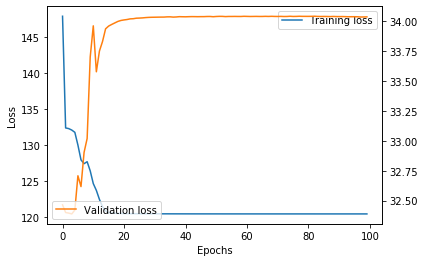

In [78]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(training_loss))

ax1.plot(x, training_loss, label='Training loss', color='C0')
ax2.plot(x, validation_loss, label='Validation loss', color='C1')

ax1.legend(loc=0)
ax2.legend(loc=3)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

In [79]:
losses['adam_1e-2'] = [training_loss, validation_loss]

Text(0.5, 1.0, 'CEL on training set, SGD with different learning rates')

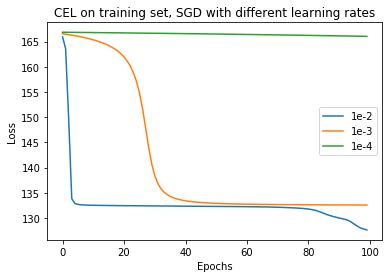

In [80]:
fig, ax = plt.subplots()

x = np.arange(len(training_loss))

ax.plot(x, losses['1e-2'][0], label='1e-2')
ax.plot(x, losses['1e-3'][0], label='1e-3')
ax.plot(x, losses['1e-4'][0], label='1e-4')

ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('CEL on training set, SGD with different learning rates')

Text(0.5, 1.0, 'CEL on training set, Adam with different learning rates')

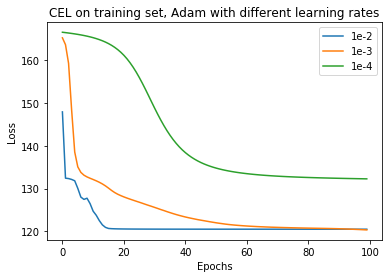

In [81]:
fig, ax = plt.subplots()

x = np.arange(len(training_loss))

ax.plot(x, losses['adam_1e-2'][0], label='1e-2')
ax.plot(x, losses['adam_1e-3'][0], label='1e-3')
ax.plot(x, losses['adam_1e-4'][0], label='1e-4')

ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('CEL on training set, Adam with different learning rates')

Text(0.5, 1.0, 'Adam with lr=1e-2')

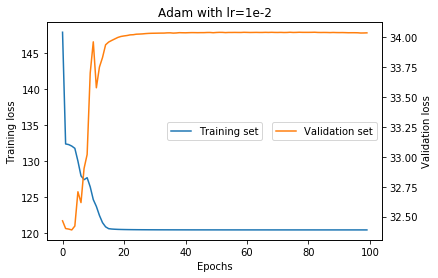

In [99]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(training_loss))

ax1.plot(x, losses['adam_1e-2'][0], label='Training set', color='C0')
ax2.plot(x, losses['adam_1e-2'][1], label='Validation set', color='C1')

ax1.legend(loc=10)
ax2.legend(loc=5)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training loss')
ax2.set_ylabel('Validation loss')
ax1.set_title('Adam with lr=1e-2')

Text(0.5, 1.0, 'Adam with lr=1e-3')

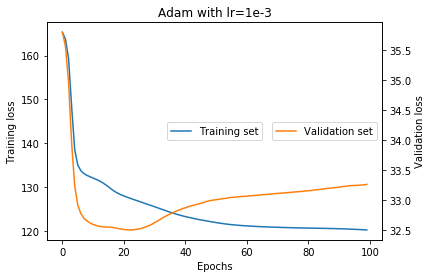

In [98]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(training_loss))

ax1.plot(x, losses['adam_1e-3'][0], label='Training set', color='C0')
ax2.plot(x, losses['adam_1e-3'][1], label='Validation set', color='C1')

ax1.legend(loc=10)
ax2.legend(loc=5)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training loss')
ax2.set_ylabel('Validation loss')
ax1.set_title('Adam with lr=1e-3')

In [108]:
net = CameraClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

training_loss = []
validation_loss = []

epochs = 30

In [109]:
# training 

for epoch in range(epochs):
    
    for data in training_data:
        inputs = torch.Tensor(data[0])
        labels = torch.tensor([data[1]], dtype=torch.long)
        
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()    

In [110]:
torch.save(net.state_dict(), 'final_model_weights')